**FINGERPRINT BASED BLOODGROUP PREDICTION PROJECT USING CNN**

In [ ]:
!pip install opendatasets

Downloading the dataset into Colaboratory

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/abhiramshibaraya/fingerprint-based-blood-group-detection")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: harsha16112003
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/abhiramshibaraya/fingerprint-based-blood-group-detection


100%|██████████| 74.2M/74.2M [00:00<00:00, 89.8MB/s]


Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import cv2
import os
import random
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
DIRECTORY = "/content/fingerprint-based-blood-group-detection/dataset"
categories = ["A+","A-","AB+","AB-","B+","B-","O+","O-"]

A+: 0
A-: 1
AB+: 2
AB-: 3
B+: 4
B-: 5
O+: 6
O-: 7


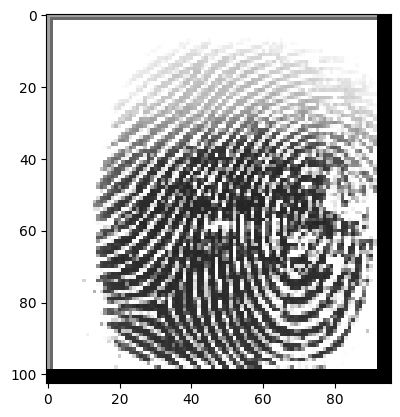

In [ ]:
IMAGE_SIZE = 255
data = []


for category in categories:
  folders = os.path.join(DIRECTORY,category)
  label = categories.index(category)
  print(f"{category}:",label)

  for img in os.listdir(folders):
    img_path = os.path.join(folders,img)
    img_arr = cv2.imread(img_path)
    img_arr_resize = cv2.resize(img_arr,(IMAGE_SIZE,IMAGE_SIZE))
    plt.imshow(img_arr)
    #plt.show()
    #break
    data.append([img_arr_resize,label])


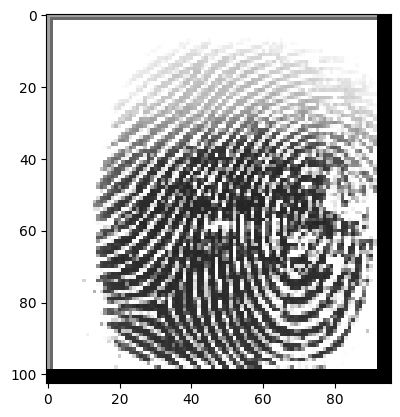

In [ ]:
plt.imshow(img_arr)
plt.show()


In [ ]:
len(data)

8000

In [ ]:
random.shuffle(data)

In [ ]:
data[0]

[array([[[161, 161, 161],
         [161, 161, 161],
         [161, 161, 161],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[161, 161, 161],
         [160, 160, 160],
         [157, 157, 157],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[161, 161, 161],
         [158, 158, 158],
         [145, 145, 145],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        ...,
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
  

Creating two lists x,y lists

In [ ]:
x=[]
y = []

for features,labels in data:
  x.append(features)
  y.append(labels)

Creating the array of x and y

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
len(x)

8000

In [ ]:
len(y)

8000

Splitting the Data into training and testing data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(6400, 255, 255, 3)

In [ ]:
x_train[0].shape

(255, 255, 3)

In [ ]:
x_test.shape

(1600, 255, 255, 3)

In [ ]:
y_train.shape

(6400,)

In [ ]:
y_test.shape

(1600,)

In [ ]:
#x_train = x_train/255
#x_test = x_test/255

BULDING the VGGNET MODEL

In [ ]:
import tensorflow

In [ ]:
from keras.applications.vgg19 import VGG19

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
from keras.layers import Dense,Flatten

In [ ]:
vgg = VGG19(input_shape=(255,255,3),weights="imagenet",include_top=False)


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layers in vgg.layers:
  layers.trainable = False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(8,activation="softmax")(x)

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
model = Model(inputs=vgg.inputs,outputs = prediction)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 255, 255, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 255, 255, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 255, 255, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 127, 127, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 127, 127, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 63, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 63, 63, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 63, 63, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 63, 63, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 63, 63, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 31, 31, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 31, 31, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 31, 31, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 31, 31, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 31, 31, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,225,096 (77.15 MB)

 Trainable params: 200,712 (784.03 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
early_stopping = EarlyStopping(monitor="accuracy",mode="max",verbose=1,patience =5)

In [ ]:
model.compile(optimizer="adam",loss = "sparse_categorical_crossentropy",metrics =["accuracy"])

In [ ]:
history = model.fit(x_train,y_train,epochs=5,validation_split=0.1,callbacks=[early_stopping],batch_size=30,shuffle=True)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(30, 255, 255, 3))
  warnings.warn(msg)


192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.6256 - loss: 6.5898

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 255, 255, 3))
  warnings.warn(msg)


192/192 ━━━━━━━━━━━━━━━━━━━━ 84s 351ms/step - accuracy: 0.6260 - loss: 6.5835 - val_accuracy: 0.7750 - val_loss: 4.6937
Epoch 2/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 119s 309ms/step - accuracy: 0.8631 - loss: 2.2006 - val_accuracy: 0.8031 - val_loss: 5.1416
Epoch 3/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 83s 312ms/step - accuracy: 0.9272 - loss: 1.0699 - val_accuracy: 0.7750 - val_loss: 6.4113
Epoch 4/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 82s 311ms/step - accuracy: 0.9406 - loss: 0.9840 - val_accuracy: 0.8078 - val_loss: 5.1840
Epoch 5/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 82s 312ms/step - accuracy: 0.9614 - loss: 0.5227 - val_accuracy: 0.7984 - val_loss: 6.8523


In [ ]:
pred = model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 255, 255, 3))
  warnings.warn(msg)


50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 275ms/step


In [ ]:
model.evaluate(x_train,y_train)

200/200 ━━━━━━━━━━━━━━━━━━━━ 56s 277ms/step - accuracy: 0.9567 - loss: 0.7852


[1.370602011680603, 0.9412500262260437]

In [ ]:
model.evaluate(x_test,y_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 269ms/step - accuracy: 0.8077 - loss: 5.4400


[5.490034580230713, 0.8118749856948853]

In [ ]:
pred_index = [np.argmax(x) for x in pred]

In [ ]:
#optimizing the model

In [ ]:
def build_model(hp):
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(255,255,3)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(8,activation='softmax')
  ])

  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

  return model

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5)

In [ ]:
tuner_search.search(x_train,y_train,epochs=5,validation_split=0.1)

IMPORTING THE DEPENDENCIES TO BUILD THE MODEL

In [ ]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Normalization,Flatten

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense

BUILDING THE CNN MODEL

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu",input_shape=(255,255,3)))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(filters=64,kernel_size=(2,2),padding="same",activation="relu"))
cnn.add(Normalization())
cnn.add(MaxPooling2D(1,1))
cnn.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(filters=64,kernel_size=(2,2),padding="same",activation="relu"))
cnn.add(Normalization())
cnn.add(MaxPooling2D(1,1))
cnn.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
cnn.add(MaxPooling2D(2,2))
cnn.add(Flatten())
cnn.add(Dense(412,activation="relu"))
cnn.add(Dense(250,activation="relu"))
cnn.add(Dense(150,activation="relu"))
cnn.add(Dense(8,activation="softmax"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 255, 255, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 127, 127, 64)        │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization (Normalization)        │ (None, 127, 127, 64)        │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 127, 127, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 63, 63, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization_1 (Normalization)      │ (None, 63, 63, 64)          │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 63, 63, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 61504)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 412)                 │      25,340,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 250)                 │         103,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 150)                 │          37,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │           1,208 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,590,970 (97.62 MB)

 Trainable params: 25,590,712 (97.62 MB)

 Non-trainable params: 258 (1.02 KB)

In [ ]:
cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])


In [ ]:
history =cnn.fit(x_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 37s 142ms/step - accuracy: 0.2904 - loss: 21.5018 - val_accuracy: 0.6875 - val_loss: 0.8024
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step - accuracy: 0.7398 - loss: 0.6953 - val_accuracy: 0.7859 - val_loss: 0.5630
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 20s 114ms/step - accuracy: 0.8291 - loss: 0.4799 - val_accuracy: 0.7563 - val_loss: 0.6276
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 20s 113ms/step - accuracy: 0.8816 - loss: 0.3253 - val_accuracy: 0.8109 - val_loss: 0.5565
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 20s 114ms/step - accuracy: 0.9203 - loss: 0.2101 - val_accuracy: 0.7703 - val_loss: 0.6653
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 21s 114ms/step - accuracy: 0.9517 - loss: 0.1337 - val_accuracy: 0.7812 - val_loss: 0.7476
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 41s 113ms/step - accuracy: 0.9497 - loss: 0.1462 - val_accuracy: 0.8125 - val_loss: 0.5494
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 21s 115ms/step - accuracy: 0.9602 - loss: 

In [ ]:
cnn.evaluate(x_train,y_train)

200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9797 - loss: 0.0534


[0.12981528043746948, 0.9651562571525574]

In [ ]:
cnn.evaluate(x_test,y_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8137 - loss: 0.8991


[0.9009085297584534, 0.8075000047683716]

In [ ]:
pred = cnn.predict(x_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


In [ ]:
index = [np.argmax(i) for i in pred]

In [ ]:
index

[6,
 0,
 0,
 2,
 7,
 2,
 7,
 7,
 2,
 5,
 3,
 2,
 3,
 7,
 4,
 7,
 6,
 2,
 5,
 6,
 3,
 2,
 1,
 0,
 7,
 5,
 3,
 3,
 7,
 7,
 7,
 6,
 6,
 1,
 1,
 7,
 3,
 7,
 6,
 7,
 6,
 7,
 2,
 0,
 4,
 5,
 6,
 7,
 5,
 5,
 2,
 7,
 0,
 0,
 1,
 7,
 6,
 2,
 3,
 7,
 7,
 6,
 7,
 6,
 7,
 5,
 0,
 0,
 6,
 2,
 5,
 7,
 5,
 2,
 1,
 4,
 3,
 4,
 5,
 0,
 0,
 7,
 5,
 2,
 2,
 3,
 0,
 6,
 6,
 0,
 4,
 6,
 3,
 2,
 5,
 1,
 7,
 0,
 3,
 1,
 0,
 2,
 4,
 3,
 1,
 2,
 6,
 7,
 3,
 3,
 4,
 2,
 5,
 0,
 4,
 4,
 6,
 3,
 1,
 2,
 2,
 5,
 7,
 5,
 2,
 4,
 6,
 2,
 0,
 3,
 6,
 7,
 5,
 3,
 7,
 3,
 0,
 6,
 5,
 6,
 4,
 5,
 3,
 1,
 7,
 3,
 3,
 1,
 5,
 7,
 5,
 2,
 5,
 4,
 0,
 7,
 2,
 7,
 6,
 1,
 2,
 0,
 0,
 2,
 3,
 0,
 4,
 4,
 6,
 1,
 1,
 1,
 5,
 4,
 6,
 2,
 0,
 7,
 2,
 6,
 5,
 5,
 7,
 5,
 7,
 4,
 6,
 5,
 2,
 7,
 0,
 7,
 7,
 0,
 6,
 2,
 5,
 3,
 0,
 4,
 4,
 7,
 5,
 5,
 5,
 2,
 2,
 7,
 0,
 4,
 4,
 7,
 6,
 2,
 2,
 2,
 4,
 3,
 3,
 3,
 6,
 7,
 5,
 2,
 5,
 7,
 5,
 0,
 2,
 6,
 0,
 3,
 1,
 7,
 7,
 3,
 3,
 5,
 6,
 6,
 7,
 3,
 5,
 5,
 6,
 0,
 1,
 7,
 2,
 2,


VISUALIZING THE MODEL

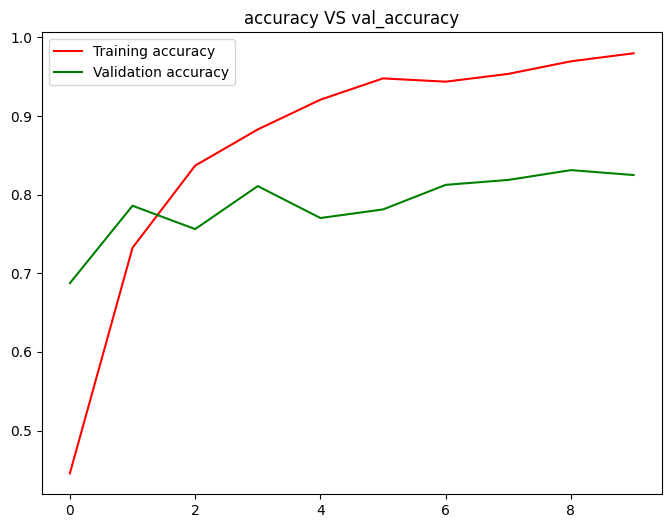

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history["val_accuracy"]
epochs = range(len(accuracy))
plt.figure(figsize=(8,6))
plt.plot(epochs,accuracy,'r',label="Training accuracy")
plt.plot(epochs,val_accuracy,'g',label="Validation accuracy")
plt.title("accuracy VS val_accuracy")
plt.legend(loc="upper left")
plt.show()

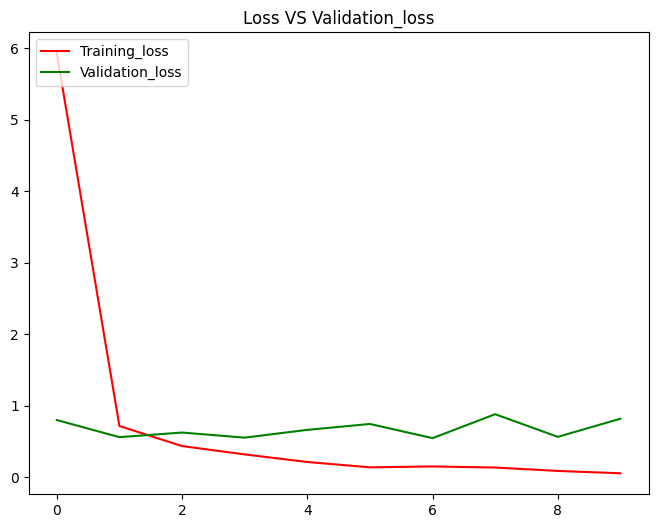

In [ ]:
loss = history.history['loss']
val_loss = history.history["val_loss"]
epochs = range(len(loss))
plt.figure(figsize=(8,6))
plt.plot(epochs,loss,'r',label="Training_loss")
plt.plot(epochs,val_loss,'g',label="Validation_loss")
plt.title("Loss VS Validation_loss")
plt.legend(loc="upper left")
plt.show()

CLASSIFICATION REPORT,CONFUSION_MATRIX

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
c_matrix = confusion_matrix(y_test,index)

In [ ]:
c_matrix

array([[165,   0,   6,   3,   0,   1,  11,  11],
       [  0, 121,   6,   8,  13,  14,  30,  12],
       [ 13,   1, 163,   0,   8,   0,   5,   6],
       [  3,   4,   2, 150,  10,  14,   5,  15],
       [  1,   2,  10,   4, 174,   7,   0,   3],
       [  1,   0,   0,   6,   6, 173,   2,   0],
       [  3,   2,  12,   3,   0,   1, 173,   8],
       [  3,   0,  16,   6,   0,   0,  11, 173]])

In [ ]:
print(classification_report(y_test,index))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       197
           1       0.93      0.59      0.72       204
           2       0.76      0.83      0.79       196
           3       0.83      0.74      0.78       203
           4       0.82      0.87      0.84       201
           5       0.82      0.92      0.87       188
           6       0.73      0.86      0.79       202
           7       0.76      0.83      0.79       209

    accuracy                           0.81      1600
   macro avg       0.82      0.81      0.81      1600
weighted avg       0.82      0.81      0.81      1600



In [ ]:
import seaborn as sns

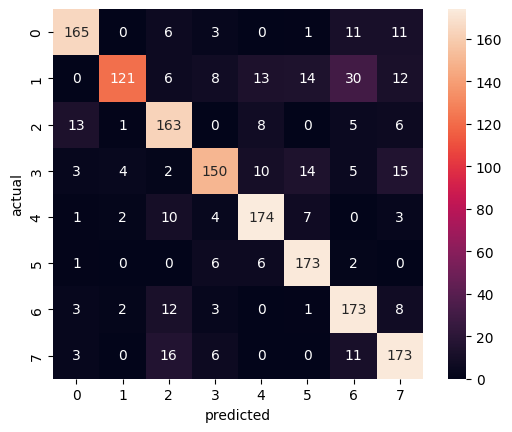

In [ ]:
sns.heatmap(c_matrix,square=True,annot=True,fmt=".0f")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

CREATING NEW DATAFRAME OF ACTUAL AND PRDICTED VALUES

In [ ]:
new_data = pd.DataFrame({
    "actual":y_test,
    "predicted":index
})

In [ ]:
new_data.head()

,actual,predicted
0,6,6
1,0,0
2,0,0
3,2,2
4,7,7


In [ ]:
new_data

,actual,predicted
0,6,6
1,0,0
2,0,0
3,2,2
4,7,7
...,...,...
1595,6,2
1596,1,1
1597,7,7
1598,2,2


END OF THE PROJECT